# MCMC analysis of cosmological FRB constraints using the Pade Approximants

**Note**: This notebook uses the updated formalism developed for Zhuge+ (2025) [[here](https://arxiv.org/abs/2508.05161)], and a Gaussian PDF for comparison.

**Fiducial Runs**

- $N=50$ events
- $N_s=15000$ samples (minus `burn-in`)
- `z_min=0.25`
- Cosmological priors: $H_0 \ \epsilon \ [40, 100]$ km/s/Mpc, $\Omega_m \ \epsilon \ [0.0, 1.0]$, $w \ \epsilon \ [-2.0, 0.0]$

## Run properties and loading modules

In [1]:
### If the MCMC functions need to be imported from a file, this should be OFF
## Depends on how the OS handles multiprossecing
SAVE_DATA = True
SAVE_FIG = True
EXTRA_CHECKS = True

In [2]:
import sys
sys.path.append('../Python_scripts')
DATA_PATH = './interpolation/095_C0mean.npz'

### Import packages
from config import *
from support import *
from cosmo_support import *
from mcmc_support import *

In [3]:
## Plotting
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## Generate data

In [4]:
## Number of random events
N_EVENTS = 50

## Minimum redshift
z_min = 0.25

## Generate events
z_centres_pdf, DM_centres_pdf, DM_obs_centre_pdf, s_DM_obs_pdf = generate_events(N_EVENTS, z_min, method='Pdf', error_size=0.2, data_path=DATA_PATH)
z_centres_gauss, DM_centres_gauss, DM_obs_centre_gauss, s_DM_obs_gauss = generate_events(N_EVENTS, z_min, method='Gaussian', error_size=0.2, data_path=DATA_PATH)


## Generate "garbadge events" (to crush-test the code)
if EXTRA_CHECKS:
    z_centres_random = rng.uniform(low=0.25, high=2.0, size=N_EVENTS)
    DM_obs_centre_random = rng.uniform(low=250, high=2000, size=N_EVENTS)
    s_DM_obs_random = np.repeat(SIGMA_DM, repeats=N_EVENTS)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.76it/s]


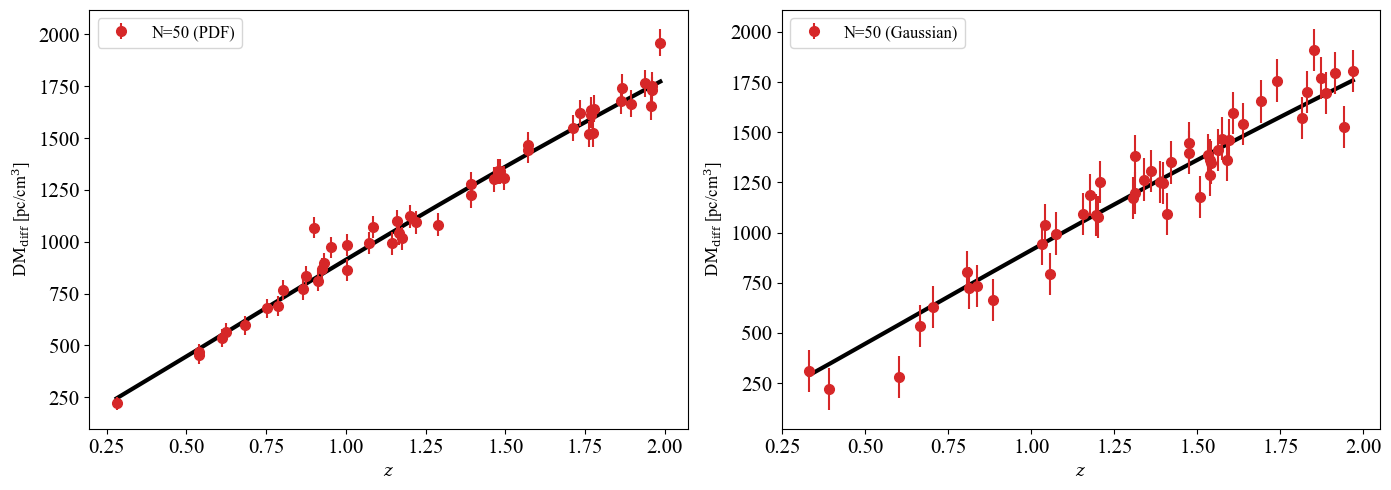

In [5]:
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.sort(z_centres_pdf), np.sort(DM_centres_pdf), c='black', lw=3)
ax1.errorbar(z_centres_pdf, DM_obs_centre_pdf, yerr=s_DM_obs_pdf, marker='o', ls='', ms=7, c='tab:red', label=f'N={N_EVENTS} (PDF)')
ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)


ax2.plot(np.sort(z_centres_gauss), np.sort(DM_centres_gauss), c='black', lw=3)
ax2.errorbar(z_centres_gauss, DM_obs_centre_gauss, yerr=s_DM_obs_gauss, marker='o', ls='', ms=7, c='tab:red', label=f'N={N_EVENTS} (Gaussian)')
ax2.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax2.set_xlabel(r'$z$', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()

# if SAVE_FIG:
#     plt.savefig("./figures/generate_FRB_events.png", dpi=300, bbox_inches='tight')

# if SAVE_DATA:
#     np.savez('./posterior/redshifts_gauss.npz',\
#              z_cs=z_centres_gauss,\
#              DM_cs=DM_centres_gauss,\
#              DM_obs_cs=DM_obs_centre_gauss,\
#              s_DM_obs_cs=s_DM_obs_gauss
#             )    

plt.show()

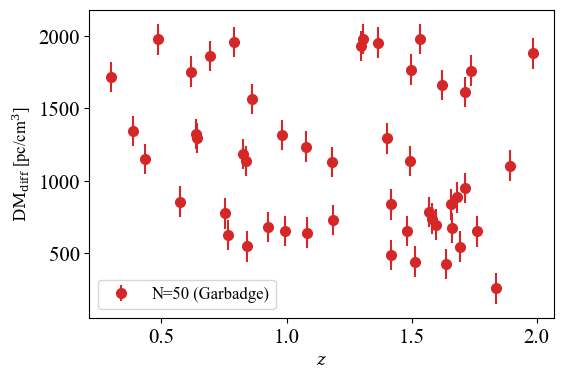

In [6]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.errorbar(z_centres_random, DM_obs_centre_random, yerr=s_DM_obs_random, marker='o', ls='', ms=7, c='tab:red', label=f'N={N_EVENTS} (Garbadge)')
ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='lower left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)

if SAVE_FIG:
    plt.savefig("./figures/generate_FRB_events_random.png", dpi=300, bbox_inches='tight')

if SAVE_DATA:
    np.savez('./posterior/redshifts_random.npz',\
             z_cs=z_centres_random,\
             DM_obs_cs=DM_obs_centre_random,\
             s_DM_obs_cs=s_DM_obs_random
            )    

plt.show()

# Run MCMC analysis

**Note**:

- For *Gaussian* runs use: `run_mcmc_analysis`.
- For *PDF* runs use: `run_mcmc_analysis_pdf`, and provide the interpolation `data_path`.

1. Standard (Numerical) ${\rm DM}$ calculation

In [6]:
samples_gauss, flat_samples_gauss = run_mcmc_analysis(z_centres_gauss, DM_obs_centre_gauss, s_DM_obs_gauss, log_probability_frb_gauss, N_samples=15000)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [16:48<00:00, 14.88it/s]


In [7]:
samples_pdf, flat_samples_pdf = run_mcmc_analysis_pdf(z_centres_pdf, DM_obs_centre_pdf, s_DM_obs_pdf, log_probability_frb_pdf, DATA_PATH, N_samples=15000)

C:\Users\klera\Documents\GitHub\DM_cosmic_Pade\Notebooks\../Python_scripts\mcmc_support.py:88: RuntimeWarning: divide by zero encountered in log10
  return np.sum(np.log10(p_obs))
100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [23:09<00:00, 10.79it/s]


2. Pade (Approximate) ${\rm DM}$ calculation

In [8]:
samples_PD_gauss, flat_samples_PD_gauss = run_mcmc_analysis(z_centres_gauss, DM_obs_centre_gauss, s_DM_obs_gauss, log_probability_frb_Pade_gauss, N_samples=15000)

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:38<00:00, 386.39it/s]


In [9]:
samples_PD_pdf, flat_samples_PD_pdf = run_mcmc_analysis_pdf(z_centres_pdf, DM_obs_centre_pdf, s_DM_obs_pdf, log_probability_frb_Pade_pdf, DATA_PATH, N_samples=15000)

C:\Users\klera\Documents\GitHub\DM_cosmic_Pade\Notebooks\../Python_scripts\mcmc_support.py:116: RuntimeWarning: invalid value encountered in log10
  log_prob = np.sum(np.log10(p_obs))
100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [08:15<00:00, 30.25it/s]


#### Save posterior data

In [25]:
if SAVE_DATA:
    np.save('./posterior/samples_gauss.npy', flat_samples_gauss)
    np.save('./posterior/samples_pdf.npy', flat_samples_pdf)
    np.save('./posterior/samples_PD_gauss.npy', flat_samples_PD_gauss)
    np.save('./posterior/samples_PD_pdf.npy', flat_samples_PD_pdf)

3. Extra checks

- Run analysis with a different redshift range (Pade approximant generally improves with redshift)
- Prior constraints (Pade approximant works better at certain regions of parameter space)
- Dependence on event generation
- Dependence on PDF used in inference (use Gaussian for constraints, when events were generated by PDF)
- Garbadge events (crush-test the code with a case where it should fail to give reasonable constraints)

For faster analysis, we focus on the Gaussian PDF here.

In [10]:
REDSHIFT_ANALYSIS = False
PRIOR_ANALYSIS = False
EVENTS_ANALYSIS = False
PDF_ANALYSIS = True
GARBADGE_ANALYSIS = True

In [11]:
if EXTRA_CHECKS:
    if REDSHIFT_ANALYSIS:
        ### REDSHIFT analysis
        z_min = 0.85
        z_centres_gauss_highz, DM_centres_gauss_highz, DM_obs_centre_gauss_highz, s_DM_obs_gauss_highz =\
        generate_events(N_EVENTS, z_min, method='Gaussian', error_size=0.2, data_path=DATA_PATH)
    
        ## Numerical run
        samples_gauss_highz, flat_samples_gauss_highz =\
        run_mcmc_analysis(z_centres_gauss_highz, DM_obs_centre_gauss_highz, s_DM_obs_gauss_highz, log_probability_frb_gauss, N_samples=15000)
    
        ## Pade run
        samples_PD_gauss_highz, flat_samples_PD_gauss_highz = run_mcmc_analysis(z_centres_gauss_highz, DM_obs_centre_gauss_highz, s_DM_obs_gauss_highz,\
                                                                                log_probability_frb_Pade_gauss, N_samples=15000)
        
        if SAVE_DATA:
            np.savez('./posterior/high_redshift_check.npz',\
                     z_cs=z_centres_gauss_highz,\
                     DM_cs=DM_centres_gauss_highz,\
                     DM_obs_cs=DM_obs_centre_gauss_highz,\
                     s_DM_obs_cs=s_DM_obs_gauss_highz,\
                     samples_num=flat_samples_gauss_highz,\
                     samples_pade=flat_samples_PD_gauss_highz
                    )

    
    ## PRIOR analysis
    if PRIOR_ANALYSIS:
        samples_PD_priors, flat_samples_PD_priors = run_mcmc_analysis(z_centres_gauss, DM_obs_centre_gauss, s_DM_obs_gauss, log_probability_frb_Pade_gauss,\
                                                                      H0_min=40, H0_max=100, Om_min=0.19, Om_max=1.0, W_min=-2.0, W_max=-0.5, N_samples=15000)
    
        if SAVE_DATA:
            np.save('./posterior/samples_PD_priors.npy', flat_samples_PD_priors)

    
    ### EVENTs analysis
    if EVENTS_ANALYSIS:
        z_min = 0.25
        z_centres_gauss_v2, DM_centres_gauss_v2, DM_obs_centre_gauss_v2, s_DM_obs_gauss_v2 = generate_events(N_EVENTS, z_min, method='Gaussian', error_size=0.2, data_path=DATA_PATH)
    
        _, flat_samples_PD_gauss_v2 = run_mcmc_analysis(z_centres_gauss_v2, DM_obs_centre_gauss_v2, s_DM_obs_gauss_v2, log_probability_frb_Pade_gauss, N_samples=15000)
    
        if SAVE_DATA:
            np.savez('./posterior/events_check.npz',\
                     z_cs=z_centres_gauss_v2,\
                     DM_cs=DM_centres_gauss_v2,\
                     DM_obs_cs=DM_obs_centre_gauss_v2,\
                     s_DM_obs_cs=s_DM_obs_gauss_v2,\
                     samples_pade=flat_samples_PD_gauss_v2
                    )

    # PDF analysis
    if PDF_ANALYSIS:
        samples_PD_pdf_gauss, flat_samples_PD_pdf_gauss = run_mcmc_analysis(z_centres_pdf, DM_obs_centre_pdf, s_DM_obs_pdf, log_probability_frb_Pade_gauss,\
                                                                  N_samples=15000)

        samples_PD_gauss_pdf, flat_samples_PD_gauss_pdf = run_mcmc_analysis_pdf(z_centres_gauss, DM_obs_centre_gauss, s_DM_obs_gauss, log_probability_frb_Pade_pdf,\
                                                                  DATA_PATH, N_samples=15000)
        
        if SAVE_DATA:
            np.save('./posterior/samples_PD_pdf_gauss.npy', flat_samples_PD_pdf_gauss)
            np.save('./posterior/samples_PD_gauss_pdf.npy', flat_samples_PD_gauss_pdf)

    # GARBADGE analysis
    if GARBADGE_ANALYSIS:
        samples_PD_garbadge_gauss, flat_samples_PD_garbadge_gauss = run_mcmc_analysis(z_centres_random, DM_obs_centre_random, s_DM_obs_random, log_probability_frb_Pade_gauss,\
                                                                  N_samples=15000)

        samples_PD_garbadge_pdf, flat_samples_PD_garbadge_pdf = run_mcmc_analysis_pdf(z_centres_random, DM_obs_centre_random, s_DM_obs_random, log_probability_frb_Pade_pdf,\
                                                                  DATA_PATH, N_samples=15000)
        
        if SAVE_DATA:
            np.save('./posterior/samples_PD_garbadge_gauss.npy', flat_samples_PD_garbadge_gauss)
            np.save('./posterior/samples_PD_garbadge_pdf.npy', flat_samples_PD_garbadge_pdf)            

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:36<00:00, 413.00it/s]
C:\Users\klera\Documents\GitHub\DM_cosmic_Pade\Notebooks\../Python_scripts\mcmc_support.py:116: RuntimeWarning: invalid value encountered in log10
  log_prob = np.sum(np.log10(p_obs))
100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:31<00:00, 481.12it/s]
C:\Users\klera\Documents\GitHub\DM_cosmic_Pade\Notebooks\../Python_scripts\mcmc_support.py:116: RuntimeWarning: divide by zero encountered in log10
  log_prob = np.sum(np.log10(p_obs))
C:\Users\klera\anaconda3\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [09:16<00:00, 26.93it/s]


**Corner plot - Gaussian**

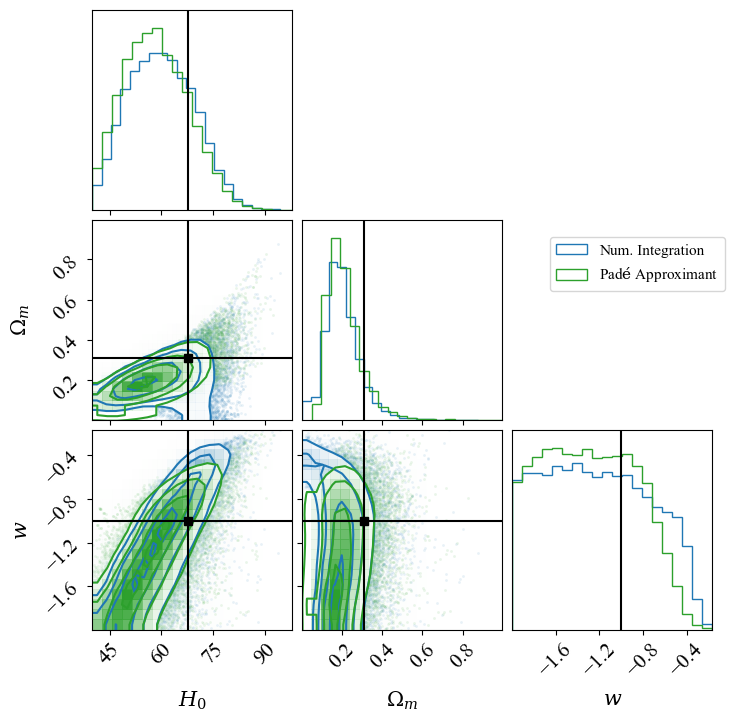

In [10]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_gauss, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend(['Num. Integration', r'Pad$\'{\rm e}$ Approximant'], loc='upper right', bbox_to_anchor=(0.1, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - PDF**

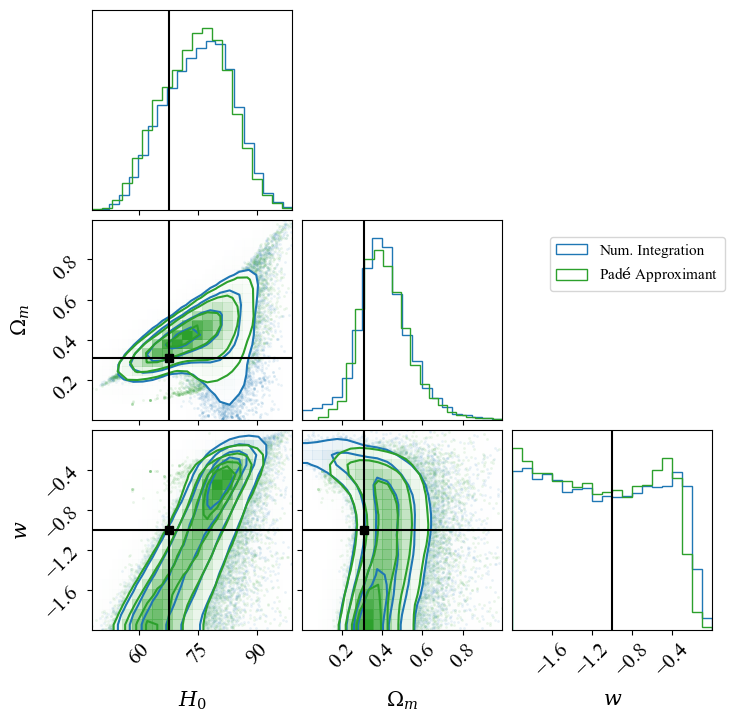

In [11]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_pdf, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_pdf, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend(['Num. Integration', r'Pad$\'{\rm e}$ Approximant'], loc='upper right', bbox_to_anchor=(0.1, 1., 1, 1), fontsize=11)
plt.show()

-----------------------------------------------------------------------------

# MCMC results investigation

## Chains

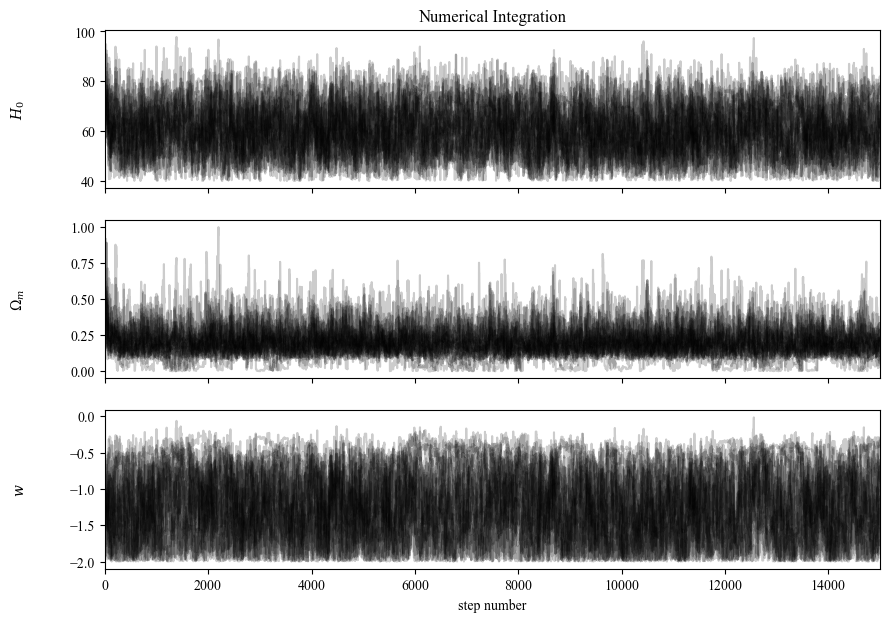

In [15]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)

for idx, name in enumerate(labels):
    ax = axes[idx]
    ax.plot(samples_gauss[:, :, idx], "k", alpha=0.2)
    ax.set_xlim(0, len(samples_gauss))
    ax.set_ylabel(name)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[0].set_title('Numerical Integration')

plt.show()

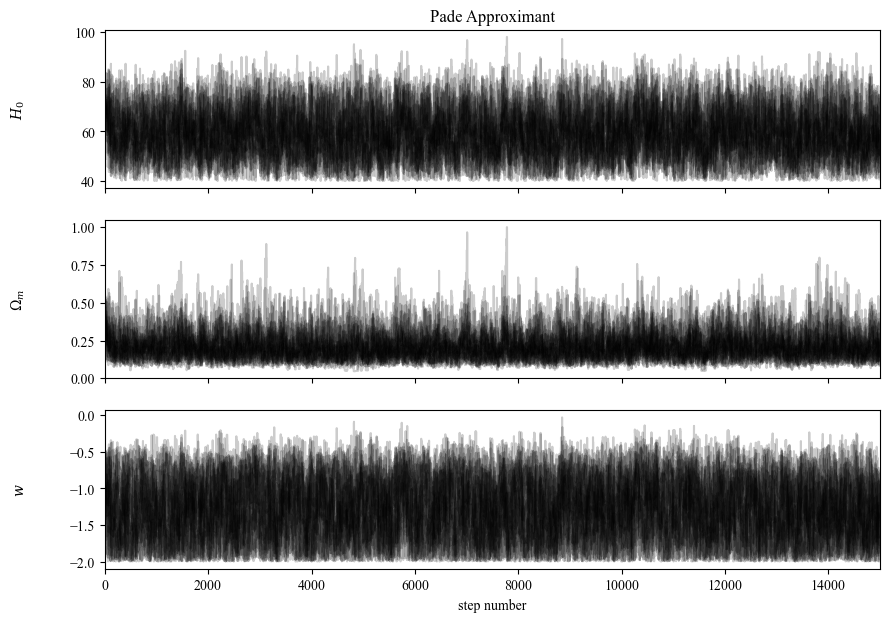

In [16]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]
for idx, name in enumerate(labels):
    ax = axes[idx]
    ax.plot(samples_PD_gauss[:, :, idx], "k", alpha=0.2)
    ax.set_xlim(0, len(samples_PD_gauss))
    ax.set_ylabel(name)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[0].set_title('Pade Approximant')

plt.show()

**Garbadge events**

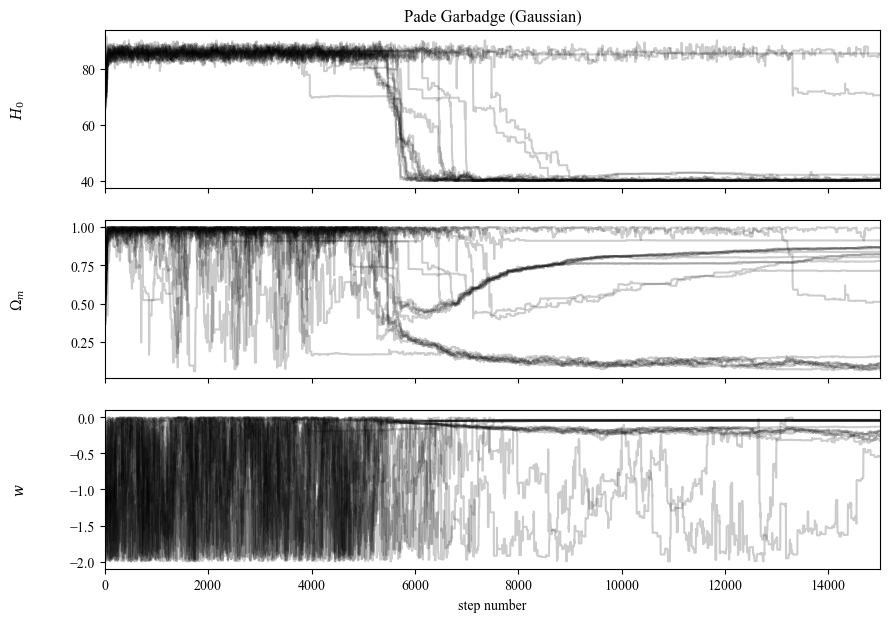

In [15]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]
for idx, name in enumerate(labels):
    ax = axes[idx]
    ax.plot(samples_PD_garbadge_gauss[:, :, idx], "k", alpha=0.2)
    ax.set_xlim(0, len(samples_PD_garbadge_gauss))
    ax.set_ylabel(name)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[0].set_title('Pade Garbadge (Gaussian)')

plt.show()

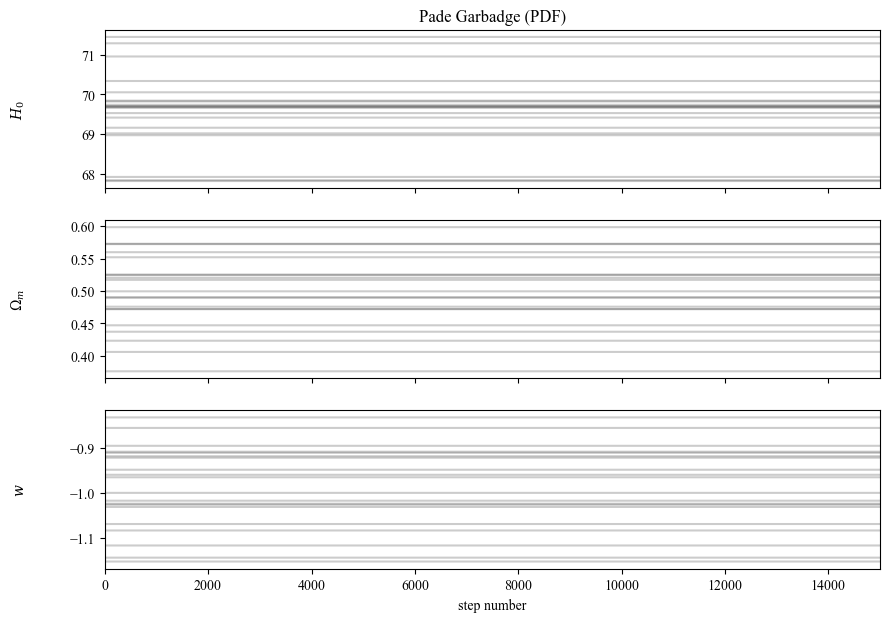

In [16]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]
for idx, name in enumerate(labels):
    ax = axes[idx]
    ax.plot(samples_PD_garbadge_pdf[:, :, idx], "k", alpha=0.2)
    ax.set_xlim(0, len(samples_PD_garbadge_pdf))
    ax.set_ylabel(name)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
axes[0].set_title('Pade Garbadge (PDF)')

plt.show()

## Individual corner plots

**Gaussian**

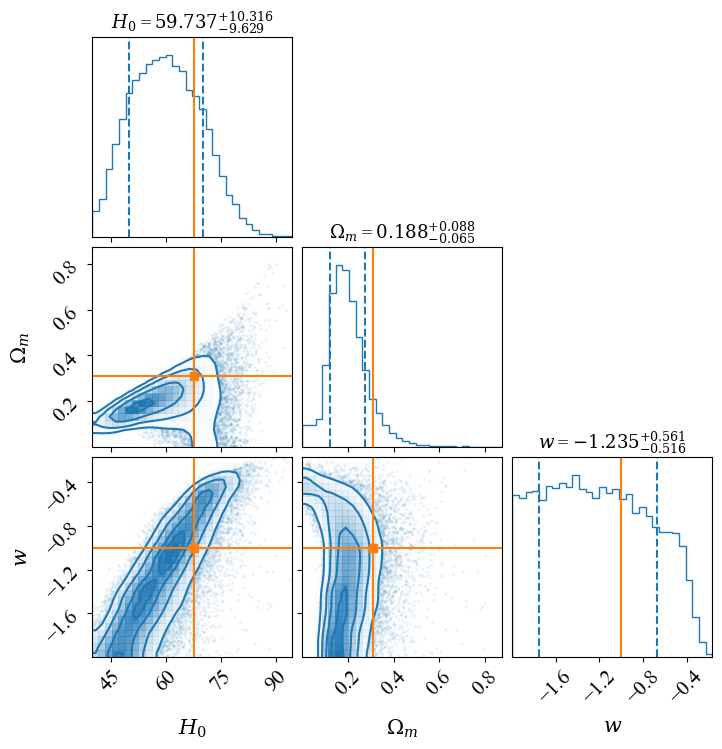

In [17]:
mcmc_plot_results(flat_samples_gauss, labels, [HUBBLE, OMEGA_MATTER, W_LAMBDA])

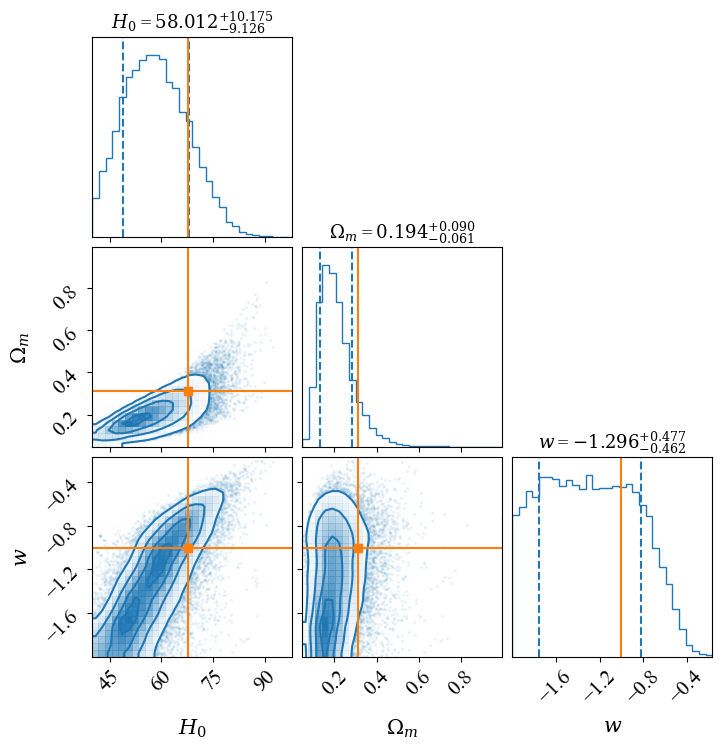

In [18]:
mcmc_plot_results(flat_samples_PD_gauss, labels, [HUBBLE, OMEGA_MATTER, W_LAMBDA])

**PDF**

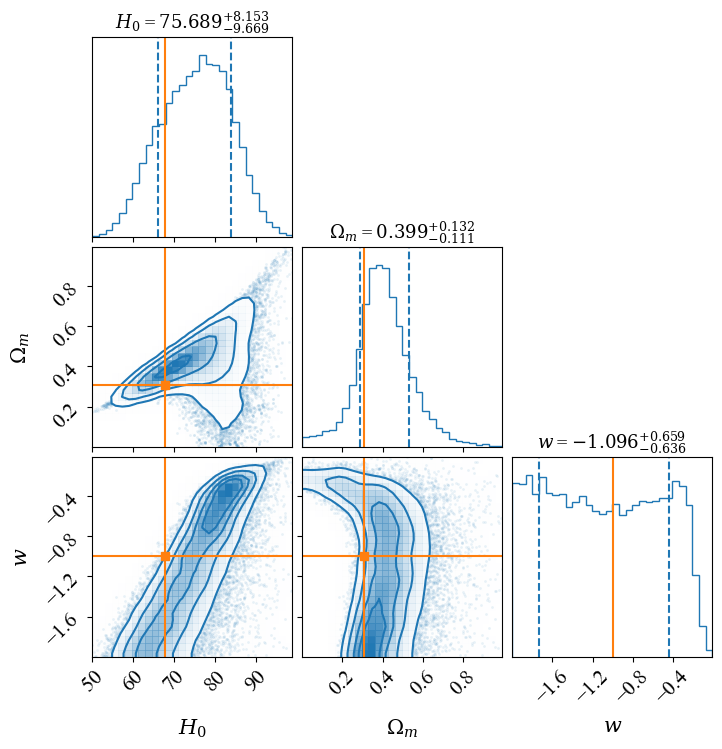

In [19]:
mcmc_plot_results(flat_samples_pdf, labels, [HUBBLE, OMEGA_MATTER, W_LAMBDA])

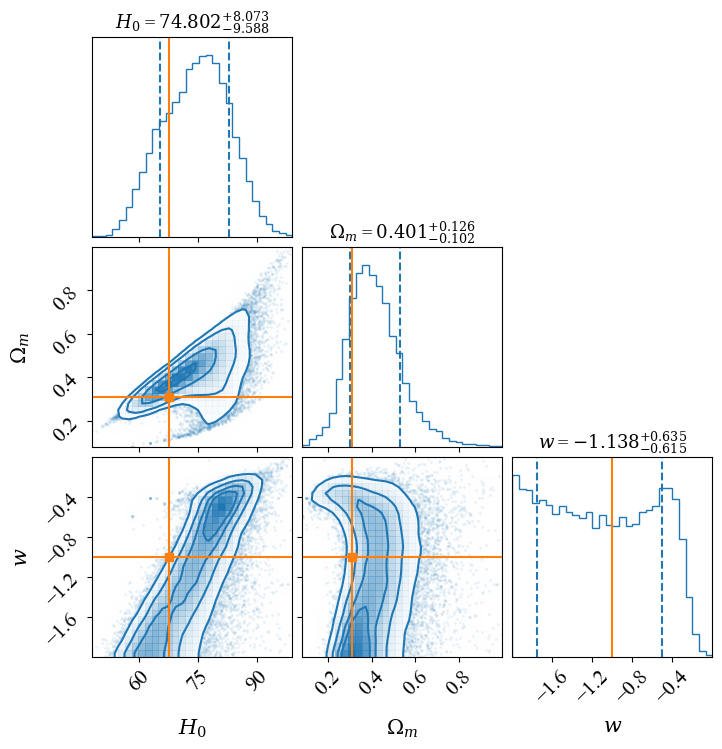

In [20]:
mcmc_plot_results(flat_samples_PD_pdf, labels, [HUBBLE, OMEGA_MATTER, W_LAMBDA])

## Posterior predictive checks

**Gaussian**

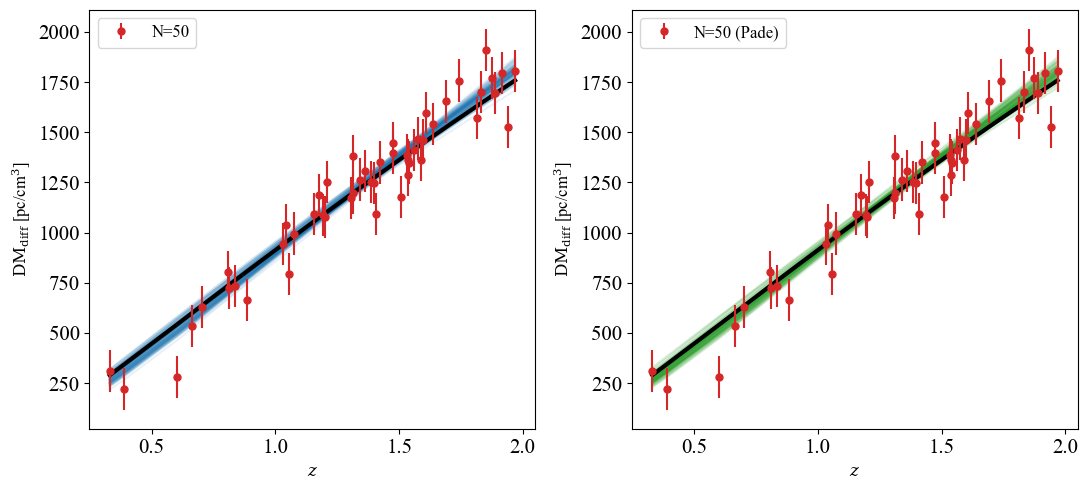

In [12]:
inds = rng.integers(len(flat_samples_gauss), size=100)

fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ind in inds:
    sample = flat_samples_gauss[ind]
    DM_i = dispersion_measure(np.sort(z_centres_gauss), H0=sample[0], Om=sample[1], w=sample[2], alpha=f_ALPHA, f_IGM_0 = f_IGM)
    ax1.plot(np.sort(z_centres_gauss), DM_i, "tab:blue", alpha=0.1)
ax1.plot(np.sort(z_centres_gauss), np.sort(DM_centres_gauss), c='black', lw=3)
ax1.errorbar(z_centres_gauss, DM_obs_centre_gauss, yerr=s_DM_obs_gauss, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS}')

ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)


for ind in inds:
    sample = flat_samples_PD_gauss[ind]
    DM_i = DM_pade_wCDM(np.sort(z_centres_gauss), H0=sample[0], Om=sample[1], w=sample[2])
    ax2.plot(np.sort(z_centres_gauss), DM_i, "tab:green", alpha=0.1)
ax2.plot(np.sort(z_centres_gauss), np.sort(DM_centres_gauss), c='black', lw=3)
ax2.errorbar(z_centres_gauss, DM_obs_centre_gauss, yerr=s_DM_obs_gauss, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS} (Pade)')

ax2.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax2.set_xlabel(r'$z$', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

**PDF**

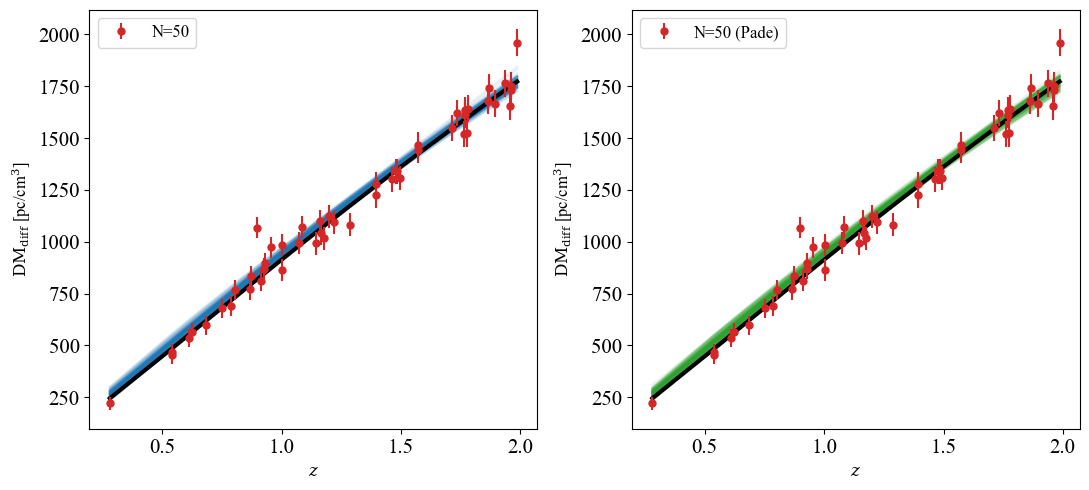

In [13]:
inds = rng.integers(len(flat_samples_pdf), size=100)

fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ind in inds:
    sample = flat_samples_pdf[ind]
    DM_i = dispersion_measure(np.sort(z_centres_pdf), H0=sample[0], Om=sample[1], w=sample[2], alpha=f_ALPHA, f_IGM_0 = f_IGM)
    ax1.plot(np.sort(z_centres_pdf), DM_i, "tab:blue", alpha=0.1)
ax1.plot(np.sort(z_centres_pdf), np.sort(DM_centres_pdf), c='black', lw=3)
ax1.errorbar(z_centres_pdf, DM_obs_centre_pdf, yerr=s_DM_obs_pdf, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS}')

ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)


for ind in inds:
    sample = flat_samples_PD_pdf[ind]
    DM_i = DM_pade_wCDM(np.sort(z_centres_pdf), H0=sample[0], Om=sample[1], w=sample[2])
    ax2.plot(np.sort(z_centres_pdf), DM_i, "tab:green", alpha=0.1)
ax2.plot(np.sort(z_centres_pdf), np.sort(DM_centres_pdf), c='black', lw=3)
ax2.errorbar(z_centres_pdf, DM_obs_centre_pdf, yerr=s_DM_obs_pdf, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS} (Pade)')

ax2.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax2.set_xlabel(r'$z$', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

**Garbadge events**

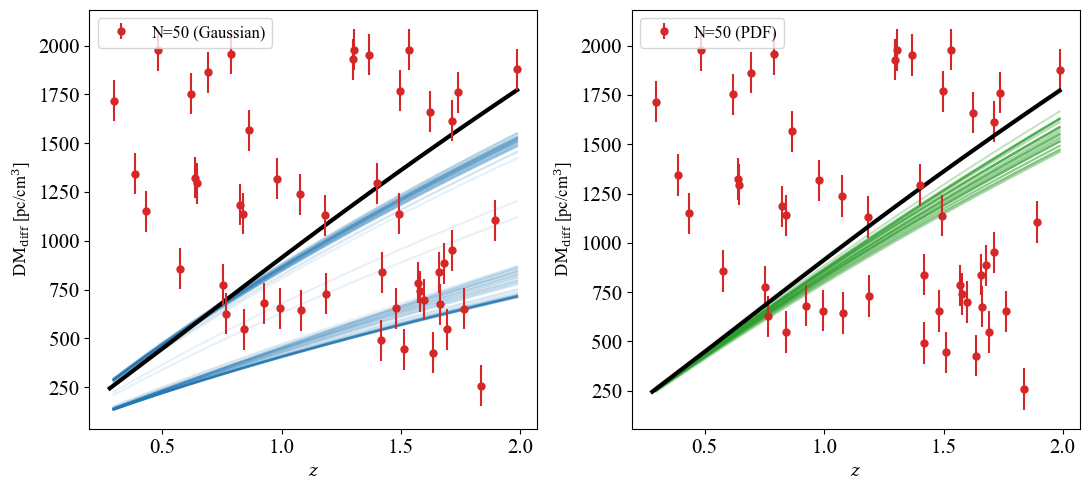

In [14]:
inds = rng.integers(len(flat_samples_PD_garbadge_gauss), size=100)

fig = plt.figure(figsize=(11, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ind in inds:
    sample = flat_samples_PD_garbadge_gauss[ind]
    DM_i = dispersion_measure(np.sort(z_centres_random), H0=sample[0], Om=sample[1], w=sample[2], alpha=f_ALPHA, f_IGM_0 = f_IGM)
    ax1.plot(np.sort(z_centres_random), DM_i, "tab:blue", alpha=0.1)
ax1.plot(np.sort(z_centres_pdf), np.sort(DM_centres_pdf), c='black', lw=3)    
ax1.errorbar(z_centres_random, DM_obs_centre_random, yerr=s_DM_obs_random, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS} (Gaussian)')

ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)


for ind in inds:
    sample = flat_samples_PD_garbadge_pdf[ind]
    DM_i = DM_pade_wCDM(np.sort(z_centres_random), H0=sample[0], Om=sample[1], w=sample[2])
    ax2.plot(np.sort(z_centres_random), DM_i, "tab:green", alpha=0.1)
ax2.errorbar(z_centres_random, DM_obs_centre_random, yerr=s_DM_obs_random, marker='o', ls='', ms=5, c='tab:red', label=f'N={N_EVENTS} (PDF)')
ax2.plot(np.sort(z_centres_pdf), np.sort(DM_centres_pdf), c='black', lw=3)
ax2.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax2.set_xlabel(r'$z$', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()